# Flight Price Prediction Project

### Problem statement 

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

#### FEATURES:
##### Airline: 
The name of the airline.

##### Date_of_Journey: 
The date of the journey

##### Source:
The source from which the service begins.

##### Destination:
The destination where the service ends.

##### Route:
The route taken by the flight to reach the destination.

##### Dep_Time:
The time when the journey starts from the source.

##### Arrival_Time:
Time of arrival at the destination.

##### Duration:
Total duration of the flight.

##### Total_Stops:
Total stops between the source and destination.

##### Additional_Info:
Additional information about the flight

##### Price:
The price of the ticket

 

### You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

 

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## The Data

Loading the data by reading the csv file as data frame

In [2]:
#uploading train data
train_data=pd.read_csv('Data_Train.csv')

In [3]:
#uploading test data
test_data=pd.read_csv('Test_set.csv')

In [4]:
#uploading sample submission
sample_data=pd.read_csv('Sample_submission.csv')

## Exploratory Data Analysis

### checking dimension

In [5]:
train_data.shape

(10683, 11)

in train dataframe, we have 10683 rows and 11 columns

In [6]:
test_data.shape

(2671, 10)

in test dataframe, we have 2671 rows and 10 columns

In [7]:
sample_data.shape

(2671, 1)

in sample dataframe, we have 2671 rows and only one column

### checking dataframe by head function

In [8]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### checking dtypes

In [10]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

all the columns are object type except Price column. Price column is int dtype

In [11]:
test_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

all the columns are object dtype

### checking infomation of dataframes by info function

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


data frame RangeIndex is 10683 entries,0 to 10682 and it has total 11 columns and one int columns and 10 object dtype

In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


data frame RangeIndex is 2671 entries,0 to 2670 and it has total 10 columns and all columns are object dtype and all columns are 2671 non null values 

### checking null values

In [14]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

in train dataframe, route column has 1 null value and Total_Stops has 1 null value

In [15]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

no null values in test data

<AxesSubplot:>

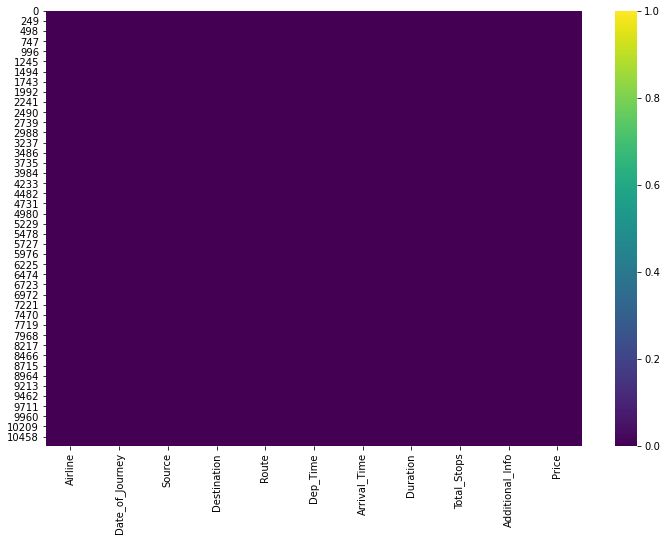

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.isnull(),cmap='viridis')

In [17]:
#we have only one row so no lose of data we can delete that row
train_data.dropna(inplace = True)

In [18]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

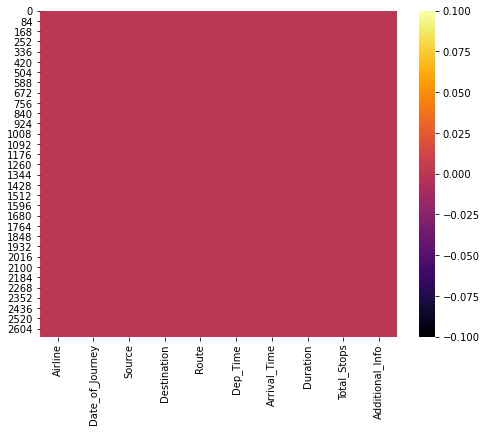

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(test_data.isnull(),cmap='inferno')

there is no null values in the test dataframe

### concating the data frames

In [20]:
#join the sample data to test datafrmae
test_data1=pd.concat([test_data,sample_data], axis =1)

In [21]:
#identification of data 
train_data['feature']='train'
test_data1['feature']='test'

In [22]:
#concat train and test data
df=pd.concat([train_data,test_data1])

In [23]:
df.sample(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,feature
770,Jet Airways,6/05/2019,Delhi,Cochin,DEL → BOM → COK,13:00,04:25 07 May,15h 25m,1 stop,No info,15554,train
5195,IndiGo,15/05/2019,Delhi,Cochin,DEL → HYD → COK,05:05,16:10,11h 5m,1 stop,No info,6818,train
10403,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,16:00,6h 15m,1 stop,No info,12295,train
1144,Air India,6/05/2019,Mumbai,Hyderabad,BOM → HYD,21:05,22:25,1h 20m,non-stop,No info,22385,test
8252,SpiceJet,18/04/2019,Banglore,Delhi,BLR → DEL,21:10,00:05 19 Apr,2h 55m,non-stop,No check-in baggage included,5515,train
4483,Air India,27/05/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,non-stop,No info,3100,train
8683,Multiple carriers,21/03/2019,Delhi,Cochin,DEL → BOM → COK,11:30,19:15,7h 45m,1 stop,No info,13378,train
3743,Air India,27/06/2019,Delhi,Cochin,DEL → COK,14:10,17:10,3h,non-stop,No info,5201,train
5334,Air India,6/05/2019,Kolkata,Banglore,CCU → MAA → BLR,14:35,15:20 07 May,24h 45m,1 stop,No info,6528,train
92,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,16:55,10:25 13 Mar,17h 30m,1 stop,No info,13817,train


### Features

In [24]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

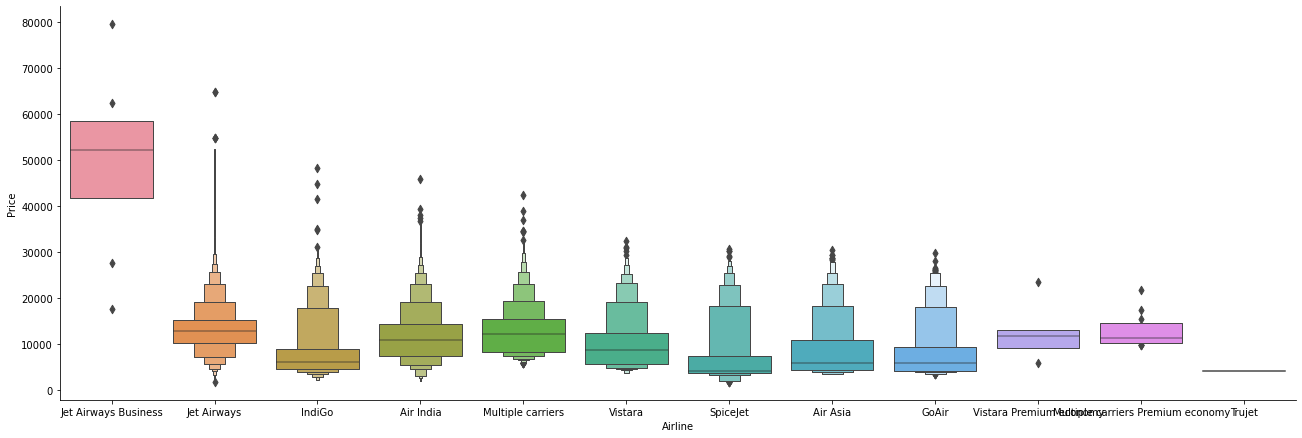

In [25]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Jet Airways Business has high price and rest airways has almost same prices

In [26]:
Airline=df[['Airline']]
Airline=pd.get_dummies(Airline)
Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [27]:
 df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [28]:
#extracting date
df["Journey_day"] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.day

#extracting month
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df=df.drop('Date_of_Journey',axis=1)

In [29]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
feature            object
Journey_day         int64
Journey_month       int64
dtype: object

In [30]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

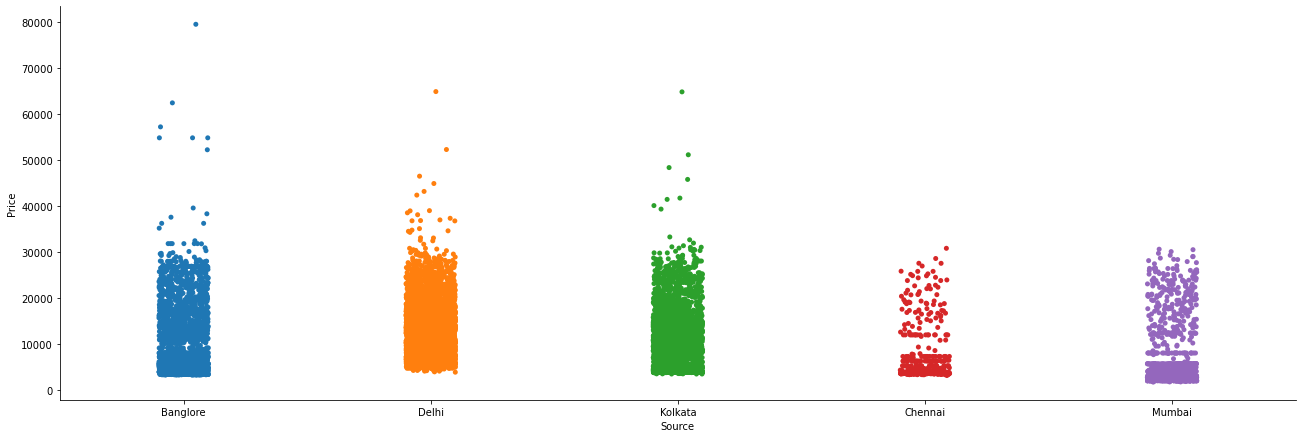

In [31]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="strip", height = 6, aspect = 3)
plt.show()

Banglore has high price and next kolkata source has high prices and Chennai has less entries and compare with other source we have less price  

In [32]:
Source=df[['Source']]
Source = pd.get_dummies(Source)
Source

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
2666,0,0,0,1,0
2667,0,0,0,1,0
2668,0,0,1,0,0
2669,0,0,1,0,0


In [33]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [34]:
df['Destination'].value_counts()

Cochin       5681
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

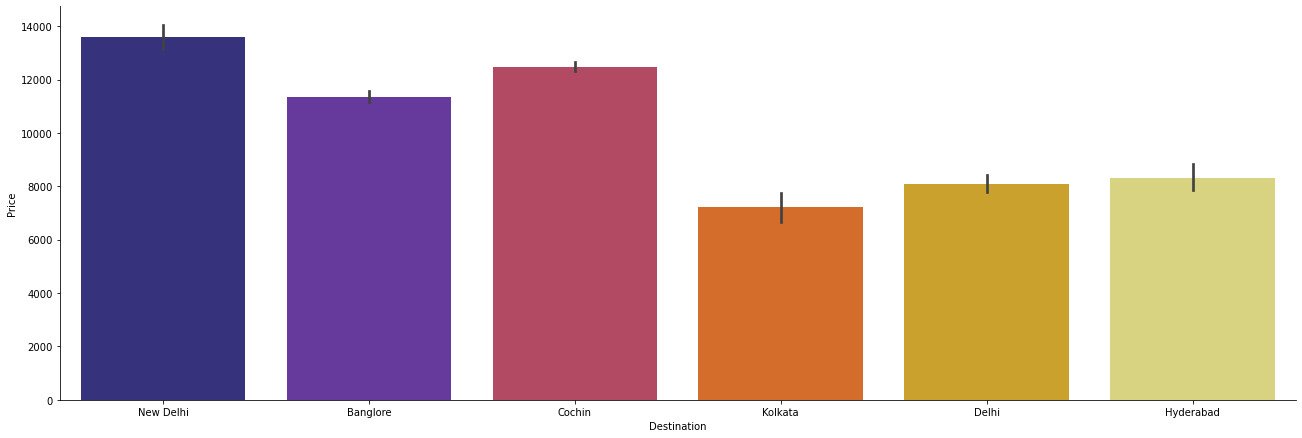

In [35]:
sns.catplot( x = "Destination", y = "Price", data = df, kind="bar", height = 6, aspect = 3,palette='CMRmap')
plt.show()

we have more flights are having New Delhi Destination and Cochin is in second place

In [36]:
Destination=df[['Destination']]
Destination=pd.get_dummies(Destination)
Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [37]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [38]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

The route taken by the flight to reach the destination. Total stops between the source and destination.
in directly route has source,destination and stops between source and destination so we have already using those. route is dummy for those so we can drop Route

In [39]:
df=df.drop('Route',axis=1)

In [40]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [41]:
df['Dep_Time']

0       22:20
1       05:50
2       09:25
3       18:05
4       16:50
        ...  
2666    20:30
2667    14:20
2668    21:50
2669    04:00
2670    04:55
Name: Dep_Time, Length: 13353, dtype: object

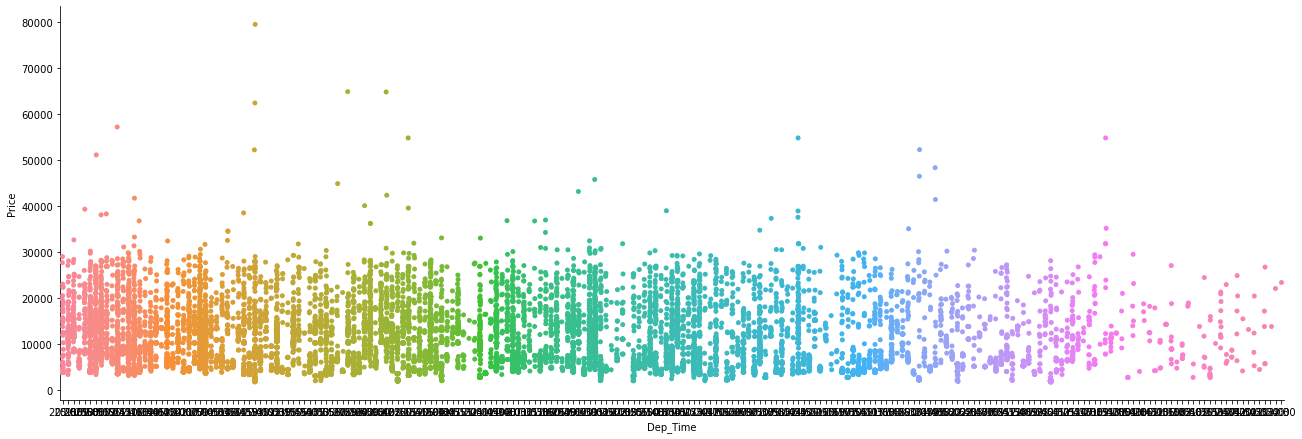

In [42]:
sns.catplot(y = "Price", x = "Dep_Time", data = df, kind="strip", height = 6, aspect = 3)
plt.show()

In [43]:
### Dividing the 'Dep_Time' into 'Hours' and 'Minutes'

df['Dep_hour'] = pd.to_datetime(df.Dep_Time).dt.hour
df['Dep_min'] = pd.to_datetime(df.Dep_Time).dt.minute

df=df.drop('Dep_Time',axis=1)

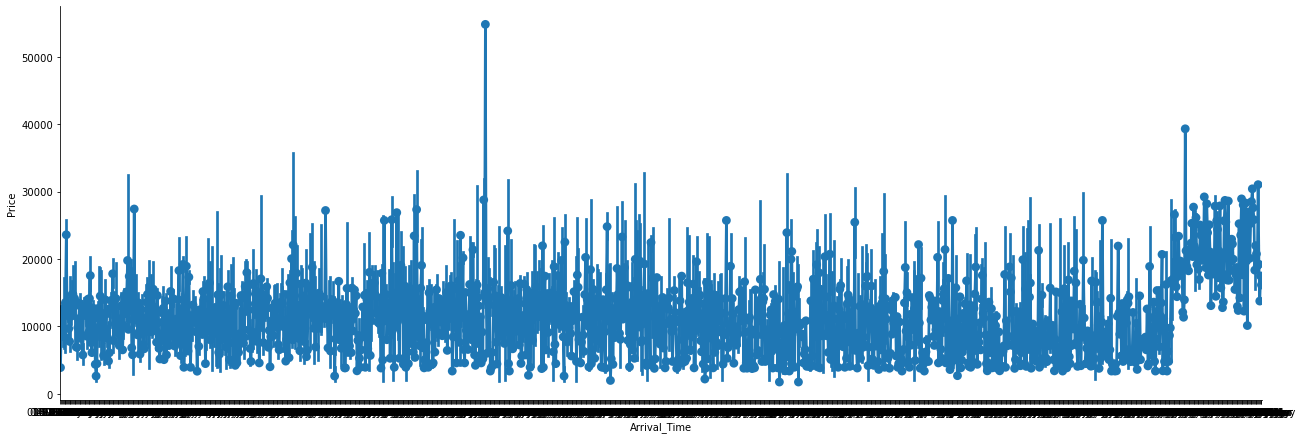

In [44]:
sns.catplot(y = "Price", x = "Arrival_Time", data = df, kind="point", height = 6, aspect = 3)
plt.show()

In [45]:
df['Arrival_Time']

0       01:10 22 Mar
1              13:15
2       04:25 10 Jun
3              23:30
4              21:35
            ...     
2666    20:25 07 Jun
2667           16:55
2668    04:25 07 Mar
2669           19:15
2670           19:15
Name: Arrival_Time, Length: 13353, dtype: object

In [46]:
### Dividing the 'Arrival_Time' into 'Hours' and 'Minutes'

df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

df=df.drop('Arrival_Time',axis=1)

In [47]:
duration = list(train_data["Duration"])

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           


for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
    
df=df.drop('Duration',axis=1)

In [48]:
# Concatenate dataframes --> df + Airline + Source + Destination
df = pd.concat([df,Airline,Source, Destination], axis = 1)
df=df.drop(['Airline','Source','Destination','Additional_Info'],axis=1)

In [49]:
df

,Total_Stops,Price,feature,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,train,24,3,22,20,1,10,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,train,5,1,5,50,13,15,0,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,train,6,9,9,25,4,25,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,train,5,12,18,5,23,30,0,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,train,3,1,16,50,21,35,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,14046,test,6,6,20,30,20,25,0,...,0,0,1,0,1,0,0,0,0,0
2667,0,14086,test,27,3,14,20,16,55,0,...,0,0,1,0,1,0,0,0,0,0
2668,1,22720,test,3,6,21,50,4,25,0,...,0,1,0,0,0,1,0,0,0,0
2669,1,23544,test,3,6,4,0,19,15,0,...,0,1,0,0,0,1,0,0,0,0


### spliting data

In [50]:
train=df.loc[df['feature']=='train']
test=df.loc[df['feature']=='test']

In [51]:
train=train.drop('feature',axis=1)
test=test.drop(['feature','Price'],axis=1)

In [52]:
x=train.drop('Price',axis=1)
y=train['Price']

### train-test-split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=20)

In [54]:
x_train.shape

(7477, 30)

In [55]:
y_train.shape

(7477,)

In [56]:
x_test.shape

(3205, 30)

In [57]:
y_test.shape

(3205,)

### Machine Learning Algorithms

In [58]:
models=[LinearRegression(),Lasso(),Ridge(),
        DecisionTreeRegressor(),GradientBoostingRegressor(),
        RandomForestRegressor(),KNeighborsRegressor()]

In [59]:
for m in models:
    print('model:',m)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("r2_score:",r2_score(y_test,pred))
    print('mean_absolute_error:',mean_absolute_error(y_test,pred))
    print('mean_squared_error:',mean_squared_error(y_test,pred))
    print()
    scr=cross_val_score(m,x,y,cv=5)
    print("Cross validation score:",scr.mean())
    print('-----------------------------------------------------------')

model: LinearRegression()
r2_score: 0.6025727752704889
mean_absolute_error: 2013.1620633273888
mean_squared_error: 8080279.443254062

Cross validation score: 0.614461127546042
-----------------------------------------------------------
model: Lasso()
r2_score: 0.6033295088620563
mean_absolute_error: 2011.0326742045872
mean_squared_error: 8064893.937421835

Cross validation score: 0.6145393748896442
-----------------------------------------------------------
model: Ridge()
r2_score: 0.6022782541263989
mean_absolute_error: 2015.1700666712513
mean_squared_error: 8086267.490871621

Cross validation score: 0.6135914715611639
-----------------------------------------------------------
model: DecisionTreeRegressor()
r2_score: 0.6541431278287269
mean_absolute_error: 1413.0096983879357
mean_squared_error: 7031778.400223348

Cross validation score: 0.6976412622052235
-----------------------------------------------------------
model: GradientBoostingRegressor()
r2_score: 0.7713032081677493
mean_a

We can observe that after applying all machine learning algorithms we can conculed that GradientBoostingRegressor is best model for the

## Hyper Parameter Tunning

In [60]:
parameters = {"n_estimators":[100,200,300,400,500]
              ,"max_depth":[3,4,5,6],"min_samples_split":[2,5,8,10,12],
             "max_features":['auto','sqrt']}

gcv_gb = GridSearchCV(GradientBoostingRegressor(),param_grid=parameters,n_jobs=-1,cv=5,verbose=2)

gcv_gb.fit(x_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 5, 8, 10, 12],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [62]:
gcv_pred=gcv_gb.predict(x_test)

In [64]:
gcv_gb.best_params_

{'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 500}

In [66]:
print("r2_score:",r2_score(y_test,gcv_pred))

r2_score: 0.8251799680738587


#### Using test data

In [67]:
x1_test=test

In [68]:
predict=gcv_gb.predict(x1_test)

In [69]:
#prediction values of test data
predict

array([11324.92910778,  4758.35966501, 13373.76197962, ...,
       15557.80285486, 12413.09763114,  7893.22536659])

## Saving the model

In [71]:
import joblib
joblib.dump(gcv_gb,"Flight-Price-Prediction-project.pkl")

['Flight-Price-Prediction-project.pkl']

## read the saved model

In [72]:
model=joblib.load('Flight-Price-Prediction-project.pkl')

In [75]:
pred=model.predict(x_test)

In [76]:
print("r2_score:",r2_score(y_test,pred)*100)

r2_score: 82.51799680738587
